In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [40]:
# Load Dataset
file_path = "D:\LSTM sales forecasting dl project\sales_data.csv"  
df = pd.read_csv(file_path)


In [41]:
print(df)

     Product_ID   Sale_Date Sales_Rep Region  Sales_Amount  Quantity_Sold  \
0          1052  2023-02-03       Bob  North       5053.97             18   
1          1093  2023-04-21       Bob   West       4384.02             17   
2          1015  2023-09-21     David  South       4631.23             30   
3          1072  2023-08-24       Bob  South       2167.94             39   
4          1061  2023-03-24   Charlie   East       3750.20             13   
..          ...         ...       ...    ...           ...            ...   
995        1010  2023-04-15   Charlie  North       4733.88              4   
996        1067  2023-09-07       Bob  North       4716.36             37   
997        1018  2023-04-27     David  South       7629.70             17   
998        1100  2023-12-20     David   West       1629.47             39   
999        1086  2023-08-16     Alice   East       4923.93             48   

    Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
0   

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [43]:
# Convert Date Column to DateTime Format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df.set_index('Sale_Date', inplace=True)


In [44]:
# Aggregate Sales Amount by Date
daily_sales = df.groupby(df.index)['Sales_Amount'].sum()


In [45]:
# Normalize Data
scaler = MinMaxScaler()
daily_sales_scaled = scaler.fit_transform(daily_sales.values.reshape(-1, 1))


In [46]:
# Prepare Data for Sequence Model
sequence_length = 30  # Using past 30 days to predict next day
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(daily_sales_scaled, sequence_length)

In [47]:
# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [48]:
# Reshape Data for LSTM/GRU (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [49]:
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.3),
    GRU(100, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1)
])

c:\Users\Asus\anaconda3\envs\lstm\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')


In [52]:
# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - loss: 0.0797 - val_loss: 0.0415
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0357 - val_loss: 0.0392
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0324 - val_loss: 0.0403
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0311 - val_loss: 0.0395
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0329 - val_loss: 0.0393
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0312 - val_loss: 0.0398
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0279 - val_loss: 0.0395
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0354 - val_loss: 0.0392
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0296 - val_loss: 0.0395
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0324 - val_loss: 0.0395
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0279 - val_loss: 0.0395
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0318 - val_l

In [53]:
# Predict Future Sales
predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


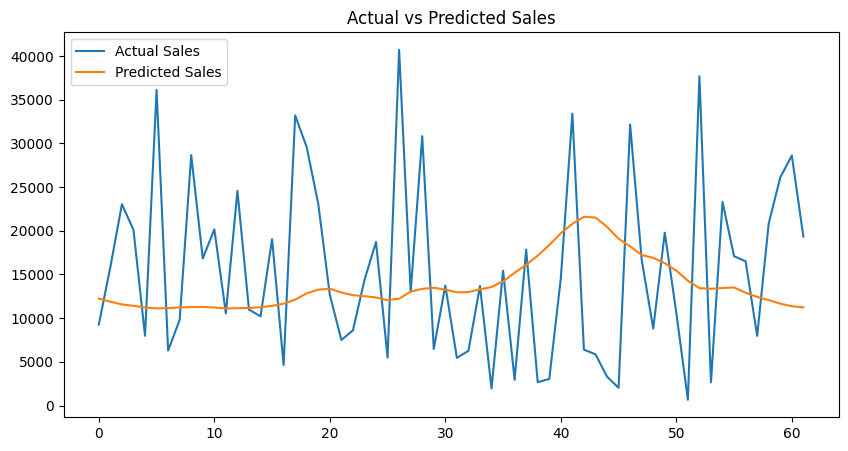

In [54]:
# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Sales')
plt.plot(predicted_sales, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()


In [56]:
# Save Model for Deployment
model.save("sales_forecasting_model.keras")